# Ejemplo de Pre-procesamiento de Texto en Espa√±ol: Limpieza, normalizaci√≥n y NER
**Objetivo**: Practicar los procesos de limpieza, normalizaci√≥n y reconocimiento de entidades nombradasen Python.

Autor: Alexandra Pomares Q

#Agenda

1. Instalaci√≥n
2. Importaci√≥n librer√≠as
3. Filtrado de ruido de origen
4. Normalizaci√≥n may√∫scula y min√∫scula
5. Eliminaci√≥n de acentos y dem√°s diacr√≠ticos
6. Correcci√≥n de errores de ortograf√≠a
7. Filtrado a nivel de token
8. Filtrado de tokens basado en reglas 
9. Reconocimiento de entidades nombradas

# Instalaci√≥n
!python -m spacy download es_core_news_lg
### Despu√©s de instalarlo reiniciar el entorno de ejecuci√≥n con Ctrl + M + . o con Entorno de ejecuci√≥n/ Reiniciar entorno de ejecuci√≥n
### Atenci√≥n, al reiniciarlo todas las variables cargadas en el entorno se reinician.

In [1]:
!pip install --upgrade spacy

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.4 MB 6.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42 kB 1.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 456 kB 30.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 621 kB 60.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10.1 MB 19.9 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    U

In [2]:
!python -m spacy download es_core_news_lg

2021-08-02 23:52:21.681183: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 568.4 MB 13 kB/s 
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [3]:
!pip install emoji --upgrade

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 184 kB 7.8 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=3ce4d01153115530dae71ce94ba8692ee9329c834f0dbbe94d49e303167e487f
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [4]:
!pip install pyspellchecker

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.7 MB 6.9 MB/s 


# Importaci√≥n de Librer√≠as

In [1]:
# Importaci√≥n de librer√≠as

import spacy
# Debes verificar que la versi√≥n de Spacy sea 3 o superior para que tener las √∫ltimas versiones de los modelos que usaremos.
print("spaCy version: ", spacy.__version__)
# Librer√≠a para reconocimientro y tratamiento de expresiones regulares
import re 
# Librer√≠a para reconocer emojis y expandirlos por su significado
import emoji
from emoji import demojize
# Liber√≠a para hacer revisi√≥n de ortograf√≠a
import spellchecker
from spellchecker import SpellChecker
# Para obtener directamente de una p√°gina we la informaci√≥n
import requests
# Para procesar el html
from bs4 import BeautifulSoup
#  Para creaci√≥n de series y dataframes
import pandas as pd
import numpy as np
# Librer√≠as para controlar los errores al cargar p√°ginas web
import time
from urllib.error import URLError
from urllib3.exceptions import LocationParseError


# Para realizar gr√°ficos
import numpy, matplotlib
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud





spaCy version:  3.1.1


# Lectura del texto de fuente de datos
Cargaremos una p√°gina web usando la librer√≠a requests y la filtraremos usando la librer√≠a beautifulsoup.

In [2]:
# A continuaci√≥n seleccionamos una URL
base_url = "https://proverbia.net/frases-de-experiencia"
try:
    page = requests.get(base_url)
except requests.exceptions.ConnectionError as r:
  r.status_code = "Conexion rechazada"
  print("Conexion rechazada")
  print("Esperar 5 segundos")
  time.sleep(5)
except URLError as r:
  r.status_code = "URL error"
  print("URL error")
except LocationParseError as r:
  r.status_code = "LocationParseError"
  print("LocationParseError")
except:
    print ("Unexpected error:", sys.exc_info()[0])

# Si la respuesta no es 200 o dentro de 200 significa que no se pudo cargar correctamente
page

<Response [200]>

## Examinar el archivo fuente 
Para cada fuente es importante examinar el formato para revisar qu√© partes son de utilidad y as√≠ poder realizar el filtro.

In [3]:
# A continuaci√≥n se examinar√° la p√°gina con BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="es">
 <head>
  <!-- Google Analytics -->
  <script>
   (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
})(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

ga('create', 'UA-59682-6', 'auto');
ga('send', 'pageview');
  </script>
  <!-- End Google Analytics -->
  <script async="" data-ad-client="ca-pub-3410145742764658" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Frases sobre la experiencia - Proverbia
  </title>
  <meta content="frases celebres,citas celebres,citas c√©lebres,frases c√©lebres,proverbios,famosas,citas arte,frases arte,sentimientos,aforismos,pensamientos,amor,vida,felicidad,sentenci

# Filtrado de ruido de origen
Ahora filtraremos el texto obtenido para mantener √∫nicamente lo que es de inter√©s. 
En este caso s√≥lo consideraremo los que est√° dentro de la etiqueta \<p\> \<\/p\>

In [5]:
# Leeremos todos los textos que est√©n dentro de la etiqueta <p> de p√°rrafo en html
parrafos = soup.find_all('p')

In [6]:
# Creamos un dataframe para almacenar los textos
column_names = ["url", "codigo", "texto"]
textos = pd.DataFrame(columns = column_names)
i = 0
# Por cada p√°rrafo encontrado obtendremos los textos eliminando las etiquetas 
for texto in parrafos:
    # Ac√° obtenemos el texto
    t = texto.get_text()
    # S√≥lo consideraremos los textos que no est√°n vac√≠os
    if(len(t) > 0):
      i = i+1
      # Adicionamos al data frrame
      new_row = {'url':base_url, 'codigo':i, 'texto':t}
      textos = textos.append(new_row, ignore_index = True)


In [7]:
# Imprimiremos la forma del dataframe para saber si los carg√≥ correctamente
textos.shape

(24, 3)

In [8]:
# Ahora veremos el encabezado
textos.head()

url  ...                                              texto
0  https://proverbia.net/frases-de-experiencia  ...  La experiencia no tiene valor √©tico alguno, es...
1  https://proverbia.net/frases-de-experiencia  ...  Una experiencia nunca es un fracaso, pues siem...
2  https://proverbia.net/frases-de-experiencia  ...  La experiencia no es lo que te sucede, sino lo...
3  https://proverbia.net/frases-de-experiencia  ...                    P√°jaro viejo no entra en jaula.
4  https://proverbia.net/frases-de-experiencia  ...  Un experto es un hombre que ha dejado de pensa...

[5 rows x 3 columns]

### Expansi√≥n de emojis
en ciertas fuentes la existencia de Emojis puede ser voluminosa. Para expandir el significado del emoji y agregarlo al texto es posible usar la librer√≠a emoji.

In [17]:
textoInformal = "No me gusta el ü•ë pero me encanta comer todo lo de üá≤üáΩ"
textoNormalizado = demojize(textoInformal, language='es')
print(textoInformal,"--->", textoNormalizado)


No me gusta el ü•ë pero me encanta comer todo lo de üá≤üáΩ ---> No me gusta el :aguacate: pero me encanta comer todo lo de :bandera_m√©xico:


# Normalizaci√≥n may√∫scula y min√∫scula
Dejaremos todo en min√∫scula usando la funci√≥n est√°ndar de Strings en python lower()


In [18]:
# crearemos una nueva columna para dejar todo en min√∫scula
textos['textoMinuscula'] = textos['texto'].str.lower()
textos.head()



url  ...                                    textoSinAcentos
0  https://proverbia.net/frases-de-experiencia  ...  LA EXPERIENCIA NO TIENE VALOR ETICO ALGUNO, ES...
1  https://proverbia.net/frases-de-experiencia  ...  UNA EXPERIENCIA NUNCA ES UN FRACASO, PUES SIEM...
2  https://proverbia.net/frases-de-experiencia  ...  LA EXPERIENCIA NO ES LO QUE TE SUCEDE, SINO LO...
3  https://proverbia.net/frases-de-experiencia  ...                    PAJARO VIEJO NO ENTRA EN JAULA.
4  https://proverbia.net/frases-de-experiencia  ...  UN EXPERTO ES UN HOMBRE QUE HA DEJADO DE PENSA...

[5 rows x 6 columns]

## Ahora t√∫ 
Crea otra columna para dejar todo en may√∫scula

In [19]:
# Escribe tu c√≥digo ac√°
textos['textoMauyuscula'] = textos['texto'].str.upper()
textos.head()

url  ...                                    textoSinAcentos
0  https://proverbia.net/frases-de-experiencia  ...  LA EXPERIENCIA NO TIENE VALOR ETICO ALGUNO, ES...
1  https://proverbia.net/frases-de-experiencia  ...  UNA EXPERIENCIA NUNCA ES UN FRACASO, PUES SIEM...
2  https://proverbia.net/frases-de-experiencia  ...  LA EXPERIENCIA NO ES LO QUE TE SUCEDE, SINO LO...
3  https://proverbia.net/frases-de-experiencia  ...                    PAJARO VIEJO NO ENTRA EN JAULA.
4  https://proverbia.net/frases-de-experiencia  ...  UN EXPERTO ES UN HOMBRE QUE HA DEJADO DE PENSA...

[5 rows x 6 columns]

# Eliminaci√≥n de acentos
Para eliminar acentos nos valdemos de la librer√≠a unicodedata. Unicode es un consorcio que mantiene el est√°ndar de caracteres incluyendo su representaci√≥n y codificaci√≥n https://home.unicode.org/

In [20]:
import unicodedata
def strip_accents(s):
   # Retorna el string normalizado si la categor√≠a es Mn es decir https://www.compart.com/en/unicode/category/Mn
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [21]:
# Ahora crearemos un texto sin acentos en una nueva columna
textos['textoSinAcentos'] = textos['textoMinuscula'].apply(strip_accents)


In [22]:
# Observemos la columna final y compar√©mosla con el texto original
textos

url  ...                                    textoSinAcentos
0   https://proverbia.net/frases-de-experiencia  ...  la experiencia no tiene valor etico alguno, es...
1   https://proverbia.net/frases-de-experiencia  ...  una experiencia nunca es un fracaso, pues siem...
2   https://proverbia.net/frases-de-experiencia  ...  la experiencia no es lo que te sucede, sino lo...
3   https://proverbia.net/frases-de-experiencia  ...                    pajaro viejo no entra en jaula.
4   https://proverbia.net/frases-de-experiencia  ...  un experto es un hombre que ha dejado de pensa...
5   https://proverbia.net/frases-de-experiencia  ...  la experiencia del mundo no consiste en el num...
6   https://proverbia.net/frases-de-experiencia  ...  la experiencia es algo maravilloso, nos permit...
7   https://proverbia.net/frases-de-experiencia  ...  experiencia es el nombre que damos a nuestras ...
8   https://proverbia.net/frases-de-experiencia  ...  solo una cosa es mas dolorosa que aprender de ...
9   https://proverbia.net/frases-de-experiencia  ...  pareceme, sancho, que no hay refran que no sea...
10  https://proverbia.net/frases-de-experiencia  ...  nada se sabe bien sino por medio de la experie...
11  https://proverbia.net/frases-de-experiencia  ...         la experiencia es el baston de los ciegos.
12  https://proverbia.net/frases-de-experiencia  ...  para la mayoria de los hombres, la experiencia...
13  https://proverbia.net/frases-de-experiencia  ...  entre hombre y hombre no hay gran diferencia. ...
14  https://proverbia.net/frases-de-experiencia  ...  una espina de experiencia vale mas que un bosq...
15  https://proverbia.net/frases-de-experiencia  ...  generalmente la experiencia se atribuye a las ...
16  https://proverbia.net/frases-de-experiencia  ...  un gran marinero puede navegar aunque sus vela...
17  https://proverbia.net/frases-de-experiencia  ...  la experiencia es algo que no consigues hasta ...
18  https://proverbia.net/frases-de-experiencia  ...  la experiencia tiene la misma utilidad que un ...
19  https://proverbia.net/frases-de-experiencia  ...  lo experimentado como externo no pertenece a l...
20  https://proverbia.net/frases-de-experiencia  ...  nunca le ha servido a nadie la experiencia de ...
21  https://proverbia.net/frases-de-experiencia  ...  no escribo sobre mis experiencias, sino desde ...
22  https://proverbia.net/frases-de-experiencia  ...  la experiencia es como un billete de loteria c...
23  https://proverbia.net/frases-de-experiencia  ...  un grano de buena experiencia a los 9 anos, va...

[24 rows x 6 columns]

# Correcci√≥n de errores de ortograf√≠a
Para corregir errores de ortogaf√≠a usaremos la librer√≠a pyspellchecker pues tiene implementaci√≥n en Espa√±ol. Esta librer√≠a est√° basada en el c√°lculo de la distancia de Levensthein.

In [38]:
# Adicionaremos una fila con texto con errores.
new_text = 'Para el que no sabe a donee queire llegar culquier camnio es corretco'
new_row = {'url':'http://localhost.com', 'codigo': 1, 'texto': new_text, 'textoMinuscula' : new_text.lower()}
textos = textos.append(new_row, ignore_index = True)


In [39]:
textos.tail()

url  ...                                     textoCorregido
20  https://proverbia.net/frases-de-experiencia  ...  nunca le ha servido a nadie la experiencia de ...
21  https://proverbia.net/frases-de-experiencia  ...  no escribo sobre mis experiencias sino desde f...
22  https://proverbia.net/frases-de-experiencia  ...  la experiencia es como un billete de loter√≠a c...
23  https://proverbia.net/frases-de-experiencia  ...  un grano de buena experiencia a los 9 a√±os val...
24                         http://localhost.com  ...                                                NaN

[5 rows x 7 columns]

In [40]:
# crearemos la funci√≥n para corregir los errores de un texto. Es importante tener en cuenta que si la palabra no est√°
# en el diccionario buscar√° la m√°s parecida, pero si no encuentra ninguna parecida no la corrige.

def corregirTexto(text):  
  spell = SpellChecker(language='es')
  textoCorregido = ''
  for word in text.split():
    if not(word in spell):
      textoCorregido = textoCorregido + spell.correction(word)+' '
    else:
      textoCorregido = textoCorregido + word + ' '
  return textoCorregido  



In [41]:
textos['textoCorregido'] = textos['textoMinuscula'].apply(corregirTexto)


In [42]:
textos.tail()

url  ...                                     textoCorregido
20  https://proverbia.net/frases-de-experiencia  ...  nunca le ha servido a nadie la experiencia de ...
21  https://proverbia.net/frases-de-experiencia  ...  no escribo sobre mis experiencias sino desde f...
22  https://proverbia.net/frases-de-experiencia  ...  la experiencia es como un billete de loter√≠a c...
23  https://proverbia.net/frases-de-experiencia  ...  un grano de buena experiencia a los 9 a√±os val...
24                         http://localhost.com  ...  para el que no sabe a donde queire llegar culq...

[5 rows x 7 columns]

In [43]:
# Borraremos el texto adicionado
textos.drop([24],inplace=True)

# Filtrado de tokens
Para realizar el filtrado de tokens primero debemos procesar los textos para generar los documentos con las etiquetas por cada token. Usaremos el modelo es_core_news_lg

In [44]:
# cargaremos el modelo para poder aplicar el pipeluine
nlpSpa = spacy.load('es_core_news_lg')

In [45]:
# Ahora aplicaremos todo el pipeline a los textos del data frame
textos['doc'] = textos['textoMinuscula'].apply(nlpSpa)
textos.head()



url  ...                                                doc
0  https://proverbia.net/frases-de-experiencia  ...  (la, experiencia, no, tiene, valor, √©tico, alg...
1  https://proverbia.net/frases-de-experiencia  ...  (una, experiencia, nunca, es, un, fracaso, ,, ...
2  https://proverbia.net/frases-de-experiencia  ...  (la, experiencia, no, es, lo, que, te, sucede,...
3  https://proverbia.net/frases-de-experiencia  ...           (p√°jaro, viejo, no, entra, en, jaula, .)
4  https://proverbia.net/frases-de-experiencia  ...  (un, experto, es, un, hombre, que, ha, dejado,...

[5 rows x 8 columns]

## Revisaremos los tokens generados para el documento 1 (0)

In [46]:
for token in textos['doc'][0]:
  print(token.text)

la
experiencia
no
tiene
valor
√©tico
alguno
,
es
simplemente
el
nombre
que
damos
a
nuestros
errores
.


## Filtrado de signos de puntuaci√≥n y espacios extra

In [47]:
# Crearemos un nuevo documento en el que filtraremos algunos tokens. 
# Para hacerlo definiremos un nuevo componente para agregar al pipeline que nos permita filtrar los tokens no deseados
# Espec√≠ficamente eliminaremos los signos de puntuaci√≥n y los espacios dobles, si existen
def filter_punct_Space(doc):
  # Filtraremos los signos de puntuaci√≥n y los espacios extra
  doc = [token for token in doc if not token.is_punct and not token.is_space]
  return doc


In [48]:
# Ahora aplicaremos la funci√≥n creada
textos['doc2'] = textos['doc'].apply(filter_punct_Space)
textos.head()

url  ...                                               doc2
0  https://proverbia.net/frases-de-experiencia  ...  [la, experiencia, no, tiene, valor, √©tico, alg...
1  https://proverbia.net/frases-de-experiencia  ...  [una, experiencia, nunca, es, un, fracaso, pue...
2  https://proverbia.net/frases-de-experiencia  ...  [la, experiencia, no, es, lo, que, te, sucede,...
3  https://proverbia.net/frases-de-experiencia  ...              [p√°jaro, viejo, no, entra, en, jaula]
4  https://proverbia.net/frases-de-experiencia  ...  [un, experto, es, un, hombre, que, ha, dejado,...

[5 rows x 9 columns]

## Revisaremos los tokens despu√©s del filtrado

In [ ]:
print("Tokens originales")
for token in textos['doc'][0]:
  print(token.text)
print("Tokens despu√©s del filtro")
for token in textos['doc2'][0]:
  print(token.text)

Tokens originales
la
experiencia
no
tiene
valor
√©tico
alguno
,
es
simplemente
el
nombre
que
damos
a
nuestros
errores
.
Tokens despu√©s del filtro
la
experiencia
no
tiene
valor
√©tico
alguno
es
simplemente
el
nombre
que
damos
a
nuestros
errores


## Ahora t√∫: 1
Crea una funci√≥n que elimine los n√∫meros y adiciona una columna que se llame docSinNumeros

In [ ]:
# Escribe tu c√≥digo ac√°

## Filtrado de tokens usando sus caracter√≠sticas morfo-l√©xicas
Filtraremos para dejar √∫nicamente los sustantivos, verbos y adjetivos. Recuerda los metadatos [ac√°](https://universaldependencies.org/docs/u/pos/). 

In [49]:
# Crearemos un nuevo documento en el que filtraremos algunos tokens. 
# Para hacerlo definiremos un nuevo componente para agregar al pipeline que nos permita filtrar los tokens no deseados
# Espec√≠ficamente eliminaremos los signos de puntuaci√≥n y los espacios dobles, si existen
def filter_NVJ(doc):
  # Filtraremos los signos de puntuaci√≥n y los espacios extra
  doc = [token for token in doc if token.pos_ in ('VERB', 'ADJ','NOUN','PROPN')]
  return doc


In [50]:
# Ahora aplicaremos la funci√≥n creada
textos['doc3'] = textos['doc'].apply(filter_NVJ)
textos.head()

url  ...                                               doc3
0  https://proverbia.net/frases-de-experiencia  ...  [experiencia, tiene, valor, √©tico, nombre, dam...
1  https://proverbia.net/frases-de-experiencia  ...           [experiencia, fracaso, viene, demostrar]
2  https://proverbia.net/frases-de-experiencia  ...               [experiencia, sucede, haces, sucede]
3  https://proverbia.net/frases-de-experiencia  ...                      [p√°jaro, viejo, entra, jaula]
4  https://proverbia.net/frases-de-experiencia  ...            [experto, hombre, dejado, pensar, sabe]

[5 rows x 10 columns]

## Nube de palabras filtradas
Ahora graficaremos una nube de palabras con los tokens. Usaremos la librer√≠a wordcloud y matplotlib para hacer el gr√°fico.


In [52]:
palabrasNube=""
for doc in textos['doc3']:
  for token in doc:
    palabrasNube = palabrasNube + token.lemma_ +  " "
palabrasNube
 

'experiencia tener valor √©tico nombre dar error experiencia fracaso venir demostrar experiencia suceder hacer suceder p√°jaro viejo entrar jaula experto hombre dejar pensar saber experiencia mundo consistir n√∫mero cosa ver n√∫mero cosa reflexionar fruto experiencia maravilloso permitir reconocer error vez volver cometer experiencia nombre dar equivocaci√≥n cosa doloroso aprender experiencia aprender experiencia par√©ceme sancho refr√°n verdadero sentencia sacada mesma experiencia madre ciencia saber medio experiencia experiencia bast√≥n ciego mayor√≠a hombre experiencia luz popa barco iluminar camino quedar espalda hombre hombre gran diferencia superioridad consistir aprovechar lecci√≥n experiencia espina experiencia valer bosque advertencia experiencia atribuir persona edad peor atribuir gran marinero navegar vela alquiler experiencia conseguir necesitar √©l experiencia tener utilidad billete loter√≠a sorteo experimentado externo pertenecer interno intencional experiencia residir ex

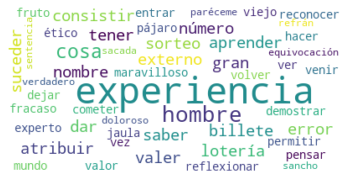

In [53]:
nube = WordCloud(max_words = 50, contour_color = "green", background_color = "white")
nube.generate(palabrasNube)
plt.figure()
plt.imshow(nube, interpolation = "bilinear")
plt.axis("off")
figura = plt.show()

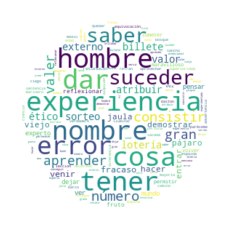

In [54]:
# Se pueden usar diferentes formas, consulta https://amueller.github.io/word_cloud/references.html
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(palabrasNube)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

## Ahora t√∫: 2
Crea una nube de palabras que incluya tambi√©n adjetivos y use una imagen de forma. Puedes elegir la imagen que m√°s te guste. Tipo: https://amueller.github.io/word_cloud/references.html

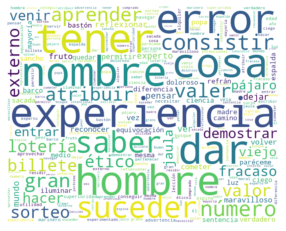

In [66]:

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
from PIL import Image
from os import path

alice_mask = np.array(Image.open("/content/lobo.png"))

wc = WordCloud(background_color="white", repeat=True, mask=alice_mask)
wc.generate(palabrasNube)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Filtrado de tokens basado en reglas
A continuaci√≥n extraeremos de los textos porciones completas (no un solo token) que cumplan con un patr√≥n, teniendo en cuenta no s√≥lo el texto, sino las etiquetas de los tokens. 

Casi toda la informaci√≥n de las etiquetas, incluidos el PoS la podemos usar para aplicar reglas sobre los textos y as√≠ reconocer patrones. Por ejemplo, si queremos obtener todos los verbos que vienen seguidos de un n√∫mero y luego una expresi√≥n de dosificaci√≥n como mililitros o miligramos podemos crear un patr√≥n y agregarlos a la clase Matcher. Puedes practicar construyendo reglas ac√°: https://explosion.ai/demos/matcher
El matcher se puede ver como un componente para expresar expresiones regulares usando las etiquetas generadas por Spacy.

Para ver la documentaci√≥n del Matcher, puede remitirse a https://spacy.io/api/matcher

## Revisi√≥n de etiquetas

In [ ]:
# Antes de generar los patrones imprimiremos un subconjunto de las etiquetas de un documento
# Encabezados
print('{:15} | {:5} | {:3} | {:11} | {:60} | {:8} | {:15} | '.format(
    'TOKEN','TAG','POS', 'DEP','MORPHO','IS_ALPHA','HEAD'))

# Etiquetas generadas por el pipeline por defecto (algunas de ellas)
for token in textos['doc'][17]:
    print('{:15} | {:5} | {:3} | {:11} | {:60} | {:8} | {:15} |'.format(
          token.text, token.tag_, token.idx, token.dep_,
          str(token.morph), token.is_alpha, token.head.text))
    

TOKEN           | TAG   | POS | DEP         | MORPHO                                                       | IS_ALPHA | HEAD            | 
nunca           | ADV   |   0 | advmod      |                                                              |        1 | servido         |
le              | PRON  |   6 | obj         | Case=Dat|Number=Sing|Person=3|PronType=Prs                   |        1 | servido         |
ha              | AUX   |   9 | aux         | Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin        |        1 | servido         |
servido         | VERB  |  12 | ROOT        | Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part             |        1 | servido         |
a               | ADP   |  20 | case        | AdpType=Prep                                                 |        1 | nadie           |
nadie           | PRON  |  22 | obj         | Number=Sing|PronType=Neg                                     |        1 | servido         |
la              | DET   |  28 | d

## Generaci√≥n de los patrones

In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(nlpSpa.vocab)
patron = [{'POS': {"IN": ["NOUN", "PROPN"]}, 'OP': '+'}, # uno o m√°s Sustantivo o nombre propio
          {'IS_ALPHA': True, 'OP': '*'}, # cero o m√°s palabras
          {'POS': {"IN": ["AUX", "VERB"]}, 'OP': '+'}, # uno o m√°s verbos
          {'IS_ALPHA': True, 'OP': '*'}, # cero o m√°s palabras
          {'POS': {"IN": ["ADJ", "ADV","NOUN", "PROPN", "VERB"]}, 'OP': '+'}]# uno o m√°s Adjetivo, Adverbio o Sustantivo o nombre propio

matcher.add("Expresivo", [patron], greedy = 'LONGEST')


In [ ]:
patron2 = [{ 'POS': {"IN": ["VERB", "AUX"]}, 'OP': '+', "IS_SENT_START": True}] # uno o m√°s Verbo o Auxiliar
matcher.add("SV", [patron2], greedy = 'LONGEST')

In [ ]:
print(spacy.explain('PROPN'))

proper noun


## B√∫squeda del patr√≥n en el texto

In [ ]:
def matcherSelector(doc):
  # Aplicaremos el matcher sobre los documentos para ver en cu√°les encuentra coincidencia
  matches = matcher(doc)
  # Ahora revisaremos si encontr√≥ el patr√≥n en el texto.
  results = []
  for match_id, start, end in matches:
    string_id = nlpSpa.vocab.strings[match_id]  # Toma la representaci√≥n del String
    span = doc[start:end]  # El span del documento que cumple con la regla, star y end es el token inicial y final del span
    #print(match_id, string_id, start, end, span.text)
    results.append([token for token in span])
  #print(doc)
  #print(results)
  return results

In [ ]:
textos['matchDoc'] = textos['doc'].apply(matcherSelector)

In [ ]:
textos

url  ...                                           matchDoc
0   https://proverbia.net/frases-de-experiencia  ...  [[nombre, que, damos, a, nuestros, errores], [...
1   https://proverbia.net/frases-de-experiencia  ...            [[experiencia, nunca, es, un, fracaso]]
2   https://proverbia.net/frases-de-experiencia  ...       [[experiencia, no, es, lo, que, te, sucede]]
3   https://proverbia.net/frases-de-experiencia  ...            [[p√°jaro, viejo, no, entra, en, jaula]]
4   https://proverbia.net/frases-de-experiencia  ...  [[experto, es, un, hombre, que, ha, dejado, de...
5   https://proverbia.net/frases-de-experiencia  ...  [[experiencia, del, mundo, no, consiste, en, e...
6   https://proverbia.net/frases-de-experiencia  ...  [[experiencia, es, el, nombre, que, damos, a, ...
7   https://proverbia.net/frases-de-experiencia  ...  [[error, cada, vez, que, lo, volvemos, a, come...
8   https://proverbia.net/frases-de-experiencia  ...  [[cosa, es, m√°s, dolorosa, que, aprender, de, ...
9   https://proverbia.net/frases-de-experiencia  ...                [[refr√°n, que, no, sea, verdadero]]
10  https://proverbia.net/frases-de-experiencia  ...  [[espina, de, experiencia, vale, m√°s, que, un,...
11  https://proverbia.net/frases-de-experiencia  ...  [[superioridad, consiste, en, aprovechar, las,...
12  https://proverbia.net/frases-de-experiencia  ...  [[experiencia, es, como, las, luces, de, popa,...
13  https://proverbia.net/frases-de-experiencia  ...                                                 []
14  https://proverbia.net/frases-de-experiencia  ...   [[experiencia, es, el, bast√≥n, de, los, ciegos]]
15  https://proverbia.net/frases-de-experiencia  ...  [[experiencia, se, atribuye, a, las, personas,...
16  https://proverbia.net/frases-de-experiencia  ...                                                 []
17  https://proverbia.net/frases-de-experiencia  ...                                                 []
18  https://proverbia.net/frases-de-experiencia  ...  [[experiencia, tiene, la, misma, utilidad, que...
19  https://proverbia.net/frases-de-experiencia  ...                                                 []
20  https://proverbia.net/frases-de-experiencia  ...  [[aprendemos], [experiencia, que, los, hombres...
21  https://proverbia.net/frases-de-experiencia  ...            [[experiencia, de, ello, resida, all√≠]]
22  https://proverbia.net/frases-de-experiencia  ...  [[experiencia, no, consiste, en, lo, que, se, ...
23  https://proverbia.net/frases-de-experiencia  ...  [[experiencia, es, como, un, billete, de, lote...

[24 rows x 10 columns]

## Ahora t√∫: 3
Escribe un patr√≥n que permita reconocer las frases que inician con un Adverbio y contienen almenos una palabra de g√©nero femenino.

In [ ]:
# Ecribe el c√≥digo aqu√≠

# Reconocimiento de entidades
Ahora revisaremos las entidades nombradas reconocidas en un pipeline. 

## Cargaremos un archivo de noticias para reconocer entidades nombradas
Usaremos una fuente que por su naturaleza tiene varias entidades nombradas, un peri√≥dico.

In [ ]:

# A continuaci√≥n seleccionamos una URL
base_url = "https://www.elespectador.com/mundo/america/quien-detiene-a-daniel-ortega/"
try:
    page = requests.get(base_url)
except requests.exceptions.ConnectionError as r:
  r.status_code = "Conexion rechazada"
  print("Conexion rechazada")
  print("Esperar 5 segundos")
  time.sleep(5)
except URLError as r:
  r.status_code = "URL error"
  print("URL error")
except LocationParseError as r:
  r.status_code = "LocationParseError"
  print("LocationParseError")
except:
    print ("Unexpected error:", sys.exc_info()[0])

# Si la respuesta no es 200 o dentro de 200 significa que no se pudo cargar correctamente
page

<Response [200]>

In [ ]:
# A continuaci√≥n se examinar√° la p√°gina con BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

In [ ]:
# Leeremos todos los textos que est√©n dentro de la etiqueta <p> de p√°rrafo en html
parrafos = soup.find_all('p')

In [ ]:
# Creamos un dataframe para almacenar las noticias
column_names = ["url", "codigo", "texto"]
noticias = pd.DataFrame(columns = column_names)
i = 0
# Por cada p√°rrafo encontrado obtendremos los textos eliminando las etiquetas 
for texto in parrafos:
    # Ac√° obtenemos el texto
    t = texto.get_text()
    # S√≥lo consideraremos los textos que no est√°n vac√≠os
    if(len(t) > 0):
      i = i+1
      # Adicionamos al data frrame
      new_row = {'url':base_url, 'codigo':i, 'texto':t}
      noticias = noticias.append(new_row, ignore_index = True)

In [ ]:
noticias.shape

(15, 3)

In [ ]:
noticias.head()

url  ...                                              texto
0  https://www.elespectador.com/mundo/america/qui...  ...  El 28 de agosto de 2020 se desat√≥ en Nicaragua...
1  https://www.elespectador.com/mundo/america/qui...  ...  La nueva ola represiva, que se desat√≥ hace dos...
2  https://www.elespectador.com/mundo/america/qui...  ...    Le puede interesar: La tormenta latinoamericana
3  https://www.elespectador.com/mundo/america/qui...  ...  ¬øQu√© busca el clan Ortega? De acuerdo con Serg...
4  https://www.elespectador.com/mundo/america/qui...  ...  Y nada parece detenerlo. Estados Unidos, Canad...

[5 rows x 3 columns]

## Aplicaremos el pipeline a los p√°rrafos cargados

In [ ]:
noticias['doc'] = noticias['texto'].apply(nlpSpa)
noticias.head()

url  ...                                                doc
0  https://www.elespectador.com/mundo/america/qui...  ...  (El, 28, de, agosto, de, 2020, se, desat√≥, en,...
1  https://www.elespectador.com/mundo/america/qui...  ...  (La, nueva, ola, represiva, ,, que, se, desat√≥...
2  https://www.elespectador.com/mundo/america/qui...  ...  (Le, puede, interesar, :, La, tormenta, latino...
3  https://www.elespectador.com/mundo/america/qui...  ...  (¬ø, Qu√©, busca, el, clan, Ortega, ?, De, acuer...
4  https://www.elespectador.com/mundo/america/qui...  ...  (Y, nada, parece, detenerlo, ., Estados, Unido...

[5 rows x 4 columns]

## Revisi√≥n de entidades reconocidas

In [ ]:
from spacy import displacy
# Entidades reconocidas
for doc in noticias['doc']:
  for ent in doc.ents[0:20]:
    print('{:10} | {:50}'.format(ent.label_, ent.text))
    # Se pueden visualizar tambi√©n en el texto
  displacy.render(doc,style='ent',jupyter=True)

LOC        | en Nicaragua                                      
PER        | Daniel Ortega                                     
PER        | Rosario Murillo                                   
ORG        | Organizaci√≥n de V√≠ctimas de Abril                 


ORG        | Presidencia                                       


/usr/local/lib/python3.7/dist-packages/spacy/displacy/__init__.py:191: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


PER        | Ortega?                                           
PER        | Sergio Ram√≠rez                                    
LOC        | Nicaragua                                         
PER        | Daniel Ortega                                     
PER        | Rosario Murillo                                   
PER        | Somoza                                            
ORG        | The New York Times                                


LOC        | Estados Unidos                                    
LOC        | Canad√°                                            
ORG        | Uni√≥n Europea                                     
PER        | Ortega                                            
LOC        | Rusia                                             
MISC       | Sputnik V                                         
PER        | Ortega                                            


LOC        | Ay Nicaragua                                      
PER        | Ortega                                            


ORG        | Consejo de Derechos Humanos de las Naciones Unidas
LOC        | en Nicaragua                                      
PER        | Daniel Ortega                                     
PER        | Rosario Murillo                                   
PER        | Cynthia Arnson                                    
PER        | Woodrow Wilson Center                             
MISC       | Con ese escenario                                 
PER        | Ortega                                            


ORG        | Organizaci√≥n de Estados Americanos                
ORG        | OEA                                               
ORG        | Carta Democr√°tica Interamericana                  
ORG        | Carta Democr√°tica Interamericana de la OEA        
LOC        | Nicaragua                                         
PER        | Daniel Ortega                                     


PER        | Daniel Ortega                                     


PER        | Ortega                                            
MISC       | A eso se                                          
PER        | Salvador S√°nchez Cer√©n                            
LOC        | El Salvador                                       
ORG        | Interpol                                          
MISC       | Seg√∫n las autoridades                             
PER        | S√°nchez Cer√©n                                     
LOC        | Gobierno de Mauricio Funes                        
PER        | Funes                                             
LOC        | Nicaragua                                         


LOC        | Espa√±a                                            
ORG        | Am√©rica Latina                                    
ORG        | OEA                                               
LOC        | Nicaragua                                         


ORG        | Iniciativa Democr√°tica de Espa√±a                  
LOC        | Am√©ricas                                          
ORG        | IDEA                                              
LOC        | Nicaragua                                         


ORG        | Carta Democr√°tica                                 
LOC        | Nicaragua                                         


PER        | Marco Rubio                                       
LOC        | Florida                                           
PER        | Joe Biden                                         
PER        | Ortega                                            
LOC        | en Nicaragua                                      


In [ ]:
# Para saber lo que significa cada etiqueta basta con usar explain
print(spacy.explain('LOC'))

Non-GPE locations, mountain ranges, bodies of water


## Adicionaremos nuevas entidades
Normalmente todos los proyectos tienen entidades especiales que deben reconocerse. Para tener estas entidades es importante contar con recursos de lenguaje que nos permitan realizar el reconocimiento de una manera m√°s sencilla o conocer claramente las reglas para reconocerlas. A continuaci√≥n crearemos una regla que permita reconocer una nueva entidad que corresponda a los cargos.

In [ ]:
# Usaremos el EntityRuler para poder definir nuevas reglas de reconocimiento de entidades
from spacy.pipeline import EntityRuler

In [ ]:
# Revisemos los proceso que ya est√°n ejecut√°ndose en el pipeline
print(nlpSpa.pipe_names)

In [ ]:
ruler = nlpSpa.add_pipe("entity_ruler")
cargos = ["senador", "presidente", "mandatario", "expresidente", "exjefe", "canciller", "excanciller", "dirigente", "pol√≠tico"]
for c in cargos:
    ruler.add_patterns([{"label": "CAR", "pattern": c}]) # Llamaremos CAR a los cargos reconocidos


In [ ]:
#nlpSpa.remove_pipe('entity_ruler')
# ATENCION: Esta l√≠nea esta comentada para no borrar el proceso del pipeline, pero se puede usar para volver a configurar el proceso y volverlo a adicionar.

In [ ]:
doc3 = nlpSpa("el senador Carlos Moreno es bueno") # Probemos la regla en un texto de prueba
for ent in doc3.ents:
    print(ent.text , '->', ent.label_)

senador -> CAR
Carlos Moreno -> PER


In [ ]:
# Observa que ahora hay un nuevo paso
print(nlpSpa.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'entity_ruler']


### Ahora nuevamente aplicaremos el pipeline

In [ ]:
noticias['doc'] = noticias['texto'].apply(nlpSpa)
noticias.head()

url  ...                                                doc
0  https://www.elespectador.com/mundo/america/qui...  ...  (El, 28, de, agosto, de, 2020, se, desat√≥, en,...
1  https://www.elespectador.com/mundo/america/qui...  ...  (La, nueva, ola, represiva, ,, que, se, desat√≥...
2  https://www.elespectador.com/mundo/america/qui...  ...  (Le, puede, interesar, :, La, tormenta, latino...
3  https://www.elespectador.com/mundo/america/qui...  ...  (¬ø, Qu√©, busca, el, clan, Ortega, ?, De, acuer...
4  https://www.elespectador.com/mundo/america/qui...  ...  (Y, nada, parece, detenerlo, ., Estados, Unido...

[5 rows x 4 columns]

In [ ]:
from spacy import displacy
# Entidades reconocidas
for doc in noticias['doc']:
  for ent in doc.ents[0:20]:
    print('{:10} | {:50}'.format(ent.label_, ent.text))
    # Se pueden visualizar tambi√©n en el texto
  displacy.render(doc,style='ent',jupyter=True)

LOC        | en Nicaragua                                      
PER        | Daniel Ortega                                     
PER        | Rosario Murillo                                   
ORG        | Organizaci√≥n de V√≠ctimas de Abril                 


ORG        | Presidencia                                       
CAR        | excanciller                                       
CAR        | dirigente                                         


/usr/local/lib/python3.7/dist-packages/spacy/displacy/__init__.py:191: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


PER        | Ortega?                                           
PER        | Sergio Ram√≠rez                                    
LOC        | Nicaragua                                         
PER        | Daniel Ortega                                     
PER        | Rosario Murillo                                   
PER        | Somoza                                            
ORG        | The New York Times                                


LOC        | Estados Unidos                                    
LOC        | Canad√°                                            
ORG        | Uni√≥n Europea                                     
PER        | Ortega                                            
LOC        | Rusia                                             
MISC       | Sputnik V                                         
PER        | Ortega                                            


LOC        | Ay Nicaragua                                      
PER        | Ortega                                            


ORG        | Consejo de Derechos Humanos de las Naciones Unidas
LOC        | en Nicaragua                                      
PER        | Daniel Ortega                                     
PER        | Rosario Murillo                                   
PER        | Cynthia Arnson                                    
PER        | Woodrow Wilson Center                             
MISC       | Con ese escenario                                 
PER        | Ortega                                            


ORG        | Organizaci√≥n de Estados Americanos                
ORG        | OEA                                               
ORG        | Carta Democr√°tica Interamericana                  
ORG        | Carta Democr√°tica Interamericana de la OEA        
LOC        | Nicaragua                                         
CAR        | presidente                                        
PER        | Daniel Ortega                                     


PER        | Daniel Ortega                                     


PER        | Ortega                                            
MISC       | A eso se                                          
PER        | Salvador S√°nchez Cer√©n                            
CAR        | expresidente                                      
LOC        | El Salvador                                       
ORG        | Interpol                                          
MISC       | Seg√∫n las autoridades                             
PER        | S√°nchez Cer√©n                                     
LOC        | Gobierno de Mauricio Funes                        
PER        | Funes                                             
LOC        | Nicaragua                                         


LOC        | Espa√±a                                            
ORG        | Am√©rica Latina                                    
ORG        | OEA                                               
LOC        | Nicaragua                                         


ORG        | Iniciativa Democr√°tica de Espa√±a                  
LOC        | Am√©ricas                                          
ORG        | IDEA                                              
LOC        | Nicaragua                                         


ORG        | Carta Democr√°tica                                 
LOC        | Nicaragua                                         


PER        | Marco Rubio                                       
CAR        | senador                                           
LOC        | Florida                                           
PER        | Joe Biden                                         
PER        | Ortega                                            
LOC        | en Nicaragua                                      


## Ahora t√∫: 4
Adiciona m√°s entidades y agr√©galas al Entity Ruler

In [ ]:
# Escribe ac√° tu c√≥digo

## Ahora t√∫: 5
Grafica en una nube de palabra solo las entidades nombradas, las anteriores y las que acabas de generar.

In [ ]:
# Escribe ac√° tu c√≥digo